---
title: Exploring Societal Inequity's Effect on (Model-Perceived) Health Outcomes 
author: Sophie Seiple, Julia Joy, Lindsey Schweitzer
date: '2024-05-9'
description: "Final Project Blog Post"
bibliography: refs.bib
format: html
---


## Abstract
In this project we explore the implementation of a machine learning model designed to make predictions concerning health outcomes. We aim to train and analyze the results of these models. We ultimately hope to identify bias from the risk scores, while acknowledging that differences in illness rates can naturally vary and are not necessarily indicative of bias. We use two model types (decision trees and random forests), found to be the optimal performers for our data, to generate risk scores for every patient in a synthetic medical data set created by Synthea [@SyntheaData]. We chose six condition "groups" to study, combining data from multiple related conditions into one has/does not have target feature. These groups included pulmonary diseases, diabetes and comorbidities, cardiovascular diseases, pregnancy and pregnancy complications, and cancer. We then interpreted risk factors for these categories across race, ethnicity, birthplace, and current town of residence. We then compared and analyzed risk scores across identities and illness categories. A significant portion of our results showed that patients of colors, and patients born in or residing in less wealthy towns have higher risk factors for some conditions, pointing to the influence of environmental and social inequity factors. Some results, however, were more evenly spaced and harder to interpret. Our findings reveal disparities in risk factors among different demographics, emphasizing the impact of environmental and social inequities on health outcomes and the need for further investigation and analysis.

## Introduction
For our project, we aim to explore the relationship between diseases and social factors such as sex, race, and town, and how these may reflect societal and environmental inequities. We understand from academic literature like "Diabetes Complications in Racial and Ethnic Minority Populations in the USA" [@Haw2021] and "The Black-White Disparity in Pregnancy-Related Mortality from 5 Conditions: Differences in Prevalence and Case-Fatality Rates" [@Tucker2007] that there exist severe inequities in risk rates across different identity groups. Building on this literature, we are interested in building a machine learning model that reveal these patterns in the US healthcare system.

Our approach is to identify the most accurate predictive model for our dataset, then use this model to generate risk likelihood scores and evaluate the relationship between different diseases and characteristics indicative of societal inequalities. We will then analyze the implications of these risk factors for inequitable, identity-based risk factors in health outcomes and complications. Our project consists of three documents, one in which we clean our original data, one in which we explore this data visually, one in which we build and explore our models, and the final one, this one, in which we describe our motivations, background, results, and analysis. Taking the general trends we witness in our data visualization document, we carried out the second half of our project; building a model that predicts risk scores.

We were inspired by Obermeyer and colleagues work [@Obermeyer2019] in analyzing the bias present in machine learning models used to guide healthcare decisions by using health costs as a proxy measure for health. This model used pre-existing bias in our healthcare system to make decisions that further marginalized oppressed identity groups. Our ultimate goal is that our models will bring to light existing inequities. Comparing the risk scores, we analyze whether trends emerged in terms of socioeconomic status (which we measure by the proxy of town of birth and residence), race, gender, and ethnicity. We then used Barocas et al.'s paper [@Barocas2023] to analyze the implications of our findings in terms of the three definitions of fairness. Finally, we referenced articles like "Explanatory learner models: Why machine learning (alone) is not the answer" [@Rosé2019] to analyze the potential negative impact of relying on machine learning models in important decision contexts and proposed solutions to this dilemma. 

## Values Statement
The motivation behind our project was to uncover potential inequities in the manifestations of certain conditions, for example does a persons race or socioeconomic status predispose them to certain conditions more than others. Our goal was to identify potential societal and environmental factors that unjustly, or disproportionately contribute to disparities in health outcomes. Our focus on this project stems from a desire to understand and address societal and evironmental inequities that contribute to disparities in health outcomes, and our personal commitments to promoting equity and social justice in healthcare.

The primary potential users of our project would include researchers, policymakers, and public health organizations interested in understanding and addressing health inequities. However, the project's findings and potential implications could also affect the communities we study, especially those that we find experience disparities in health outcomes due to social determinants. 

If our research were to be taken out of context by researchers and health professionals, and taken to be a study of biological predisposition, and not of the manifestation of social factors, our results may reinforce assumptions about health outcomes by race and ethnicity in the medical field, enforcing harmful stereotypes or leading to further marginalization of certain groups. Additionally, if the data or models have inherent biases, they could perpetuate or amplify existing disparities.

With proper usage and implementation though, we hope our results would positively impact public health programs and initiatives that work in preventative measures in the most at-risk communities. With our data, we hope that these measures would more easily identify communities in which to center efforts and awareness campaigns, by shedding light on health inequities and informing efforts to address them. 

## Material & Methods

### Our Data 

Our project utilizes a synthetic data set created for an Introduction to Biomedical Data Science Textbook, [@SyntheaData]. The data was created using Synthea, a synthetic patient generator that models the medical history of synthetic patients. Synthea’s mission is “to output high-quality synthetic, realistic but not real, patient data and associated health records covering every aspect of healthcare.” This allowed for much easier access than real patient data, as well as alleviating any privacy concerns that would arise from using real patient data. 
The link to the data can be found [here](https://data.world/siyeh/synthetic-medical-data). 

Our dataset was originally quite large, with over 200 million entries. After thorough data cleaning and preprocessing, the data was then transformed to multiple CSV documents, generally with the format of each row representing a different patient with one-hot-encoded values for multiple disease conditions. 

While using synthetic data has its benefits, it is essential to acknowledge certain inherent limitations. Firstly, despite efforts to create diverse and representative synthetic patients, there may still be discrepancies in representing certain demographic groups or medical conditions accurately. Certain rare or uncommon medical conditions may be underrepresented in the dataset due to the limitations of the modeling and analyses processes. This data is generated to represent patients from Massachusetts, so contains a population representative of this state which is primarily [White, wealthy, and educated](https://www.census.gov/quickfacts/fact/table/MA/PST045223) and does not accurately represent the diversity of the rest of the Unites States. Therefore, any generalization of results must proceed with caution. Thus while this synthetic dataset serves as a valuable resource for educational purposes, researchers and practitioners should approach its use with an understanding of its limitations. 

After cleaning our data, we performed exploratory data analysis in order to visualize out dataset, the results of which are found in [this extension of our materials and methods section, our exploratory data analysis section](https://lfschweitzer.github.io/posts/FinalProject/AnalysisDoc.html).


### Our Approach 

Since our original dataset was quite large, a thorough procedure of data cleaning and preprocessing was needed, as well as an evaluation of which parts and features of our data should be actively used as predictors for our models. We subset our data into different CSV files, each entry to a given CSV corresponding to the different category of condition. This allowed for our models to be trained more concisely and efficiently, as well as increased the interpretability of results. [This extension of methods and materials shows our data cleaning process in more depth.](https://lfschweitzer.github.io/posts/FinalProject/DataCleaning.html)

Multiple models were trained using cross-validation for each analysis of a condition group, including a logistic regression model, a decision tree classifier, a random forest classifier, and a support vector machine. These models were then evaluated for best score for a specific condition group. The best model, i.e. the one returning the highest cross-validated accuracy, was chosen as the predictive model for our general risk scores. We then trained this optimal model on our training dataset, and created predictions for our testing data that represented the probability of each entry being 1 (having a certain condition) or 0 (not having a certain condition). A risk score could then be anything between 0.00 and 1.00, where 0.50 would represent a 50% probability that the given patient has a condition. The models ran on our own personal devices, on the ML-0451 class kernel. 

## Results
The first extension of our results section is [this document](https://lfschweitzer.github.io/posts/FinalProject/ModelDoc.html), in which we run our model and generate the risk scores and comparisons we discuss in further depth here.

The results of our risk score predictions varied widely. It is important to remember that the foundation of our project is based on interpreting _our model's perceptions_ of different group's likelihoods of having a certain condition, and so they might reasonably disagree with actual trends in condition prevalence. With this in mind, in this section we will delve more deeply into the findings of our model.

First, we wanted to inspect prevalence by race, to understand whether one racial group was more often assigned higher risk scores than others across conditions.

### Results by Race:

In [2]:
# importing results for visualization

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

race_risk = pd.DataFrame()

race_risk['Race'] = ['White', 'Black', 'Hispanic', 'Asian']
race_risk['Diabetes'] = [0.312536, 0.256158, 0.340659, 0.479592]
race_risk['Pregnancy'] = [0.034260, 0.051395, 0.038217, 0.037262]
race_risk['Cancer'] = [0.051942, 0.046859, 0.051650, 0.034009]
race_risk['Heart'] = [0.502101, 0.491353, 0.491280, 0.510746]
race_risk['Lung'] = [0.507817, 0.509092, 0.492106, 0.514338]

print(race_risk)
print('Fig. 1. Table of predicted risk score values by race for each condition subset.')

       Race  Diabetes  Pregnancy    Cancer     Heart      Lung
0     White  0.312536   0.034260  0.051942  0.502101  0.507817
1     Black  0.256158   0.051395  0.046859  0.491353  0.509092
2  Hispanic  0.340659   0.038217  0.051650  0.491280  0.492106
3     Asian  0.479592   0.037262  0.034009  0.510746  0.514338
Fig. 1. Table of predicted risk score values by race for each condition subset.


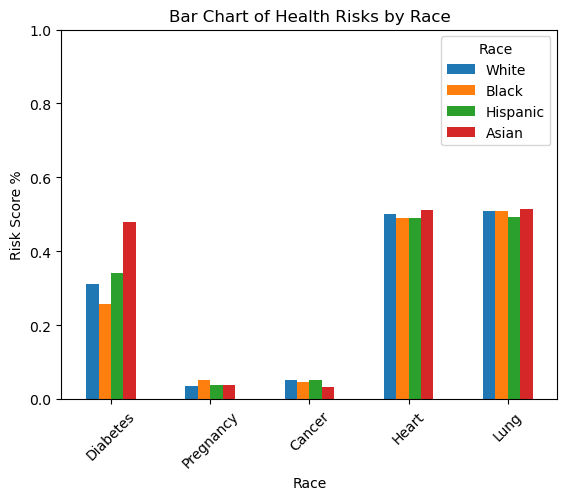

Fig. 2. Bar chart of predicted risk score values by race for each condition subset. Risk scores are given in percentage.


In [5]:
# plotting
transposed_race_risk = race_risk.set_index('Race').T
transposed_race_risk.plot(kind="bar")

plt.title('Bar Chart of Health Risks by Race')
plt.xlabel('Race')
plt.ylabel('Risk Score %')
# scale y axis by 100 to show percentage
plt.yscale('linear')  
plt.ylim(0, 1) 

plt.xticks(rotation=45)
plt.show()

print('Fig. 2. Bar chart of predicted risk score values by race for each condition subset. Risk scores are given in percentage.')


From this table and plot we can see that risk scores are generally evenly-distributed across racial categories, meaning our model does not take one racial identity as a strong risk factor for all diseases indiscriminately. 

What was interesting as we generated our predictions was that both heart and lung disease both predicted near equal risk scores, all around 50%, for all racial groups. This finding disagrees with real medical literature, which shows that Black patients are statistically more likely to experience any pulmonary defects [@LungConditionsbyRace]. Part of what could explain our high risk for lung disease across the board, and the lack of differentiation by race we would expect to see, could be due to the fact that we included a large variety of pulmonary diseases, including seasonal allergies and acute bacterial sinusitis. The latter of these, a bacterial sinus infection, is  an incredibly common condition; one in 100 common colds lead to sinusitis [@Sinusitis]. Especially as we ignore the fact that our data is simulated to have occurred over a long period of time (years), it is entirely reasonable to expect that, over a certain period of time, anyone may have a 50% risk of experiencing symptoms of sinusitis. 

In terms of heart conditions, once again our model does not match trends in medical findings about cardiovascular outcomes by race, which also finds Black patients at higher risk for cardiovascular conditions [@HeartOutcomes]. Unlike our lung conditions subset, the cardiovascular conditions identified are indicators of larger health issues, and not common complications of everyday illnesses. The fact that our model assigns equal scores regardless of race has large implications for the potential applications of a model like ours, built on synthetic data as ours was. If a model systematically underestimates the risk of groups compared to each other, for example our model would indicate treating all patients similarly regardless of their race, doctors and systems implementing our system may then systemically under-diagnose and treat Black patients, as they are unaware of their true increased risk compared to other racial groups.

In terms of diabetes, our model predicted that Asian patients are more likely to experience diabetes, prediabetes or a diabetes-related comorbidity. This agrees with medical findings, that even at lower BMIs, Asian patients are at higher risk for type-2 diabetes [@CDCDiabetes]. Our model also predicted that Black patients are at the highest risk for pregnancy complications, which again agrees with prevailing medical literature [@BlackMaternalHealth]. This is a promising result as it shows that our model may have a positive usage if implemented in healthcare settings, as it can draw attention to differentiated risks based on risk for diabetes and pregnancy complications. 

### Results by Ethnicity:

Our results for ethnicity were harder to interpret than our results by race. This following figure shows to top two most at risk ethnic groups and bottom two least at risk ethnic groups for each condition subset. We found that those in the middle often hovered around the same risk scores, and so did not provide as much valuable information for the diagnostic process.

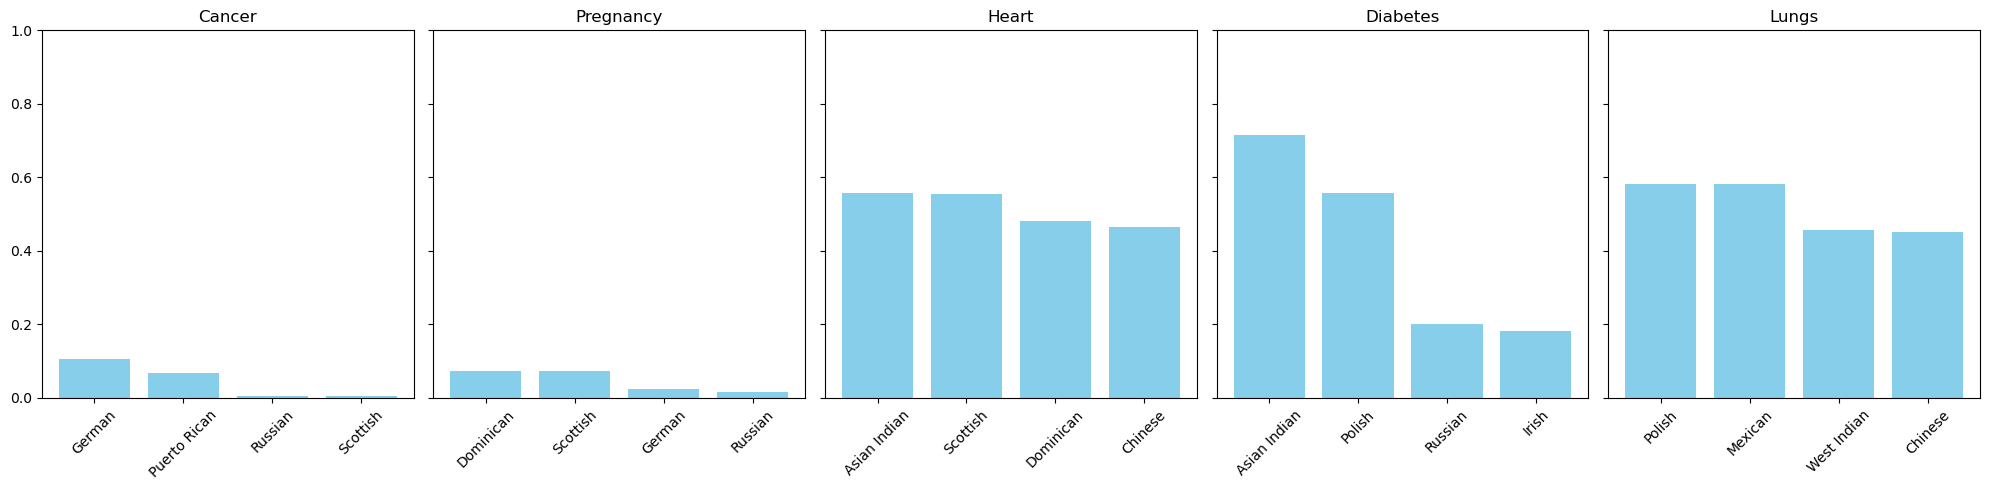

Fig. 3. The risk score, shown in percentage on the y-axis, by the top and bottom two most at-risk ethnic groups based on condition subset.


In [4]:
cancer = pd.DataFrame()
preg = pd.DataFrame()
heart = pd.DataFrame()
dia = pd.DataFrame()
lungs = pd.DataFrame()


cancer['Ethnicity'] = ['German', 'Puerto Rican', 'Russian', 'Scottish']
cancer['Risk'] = [0.105675, 0.067085, 0.005342, 0.005342]

preg['Ethnicity'] = ['Dominican', 'Scottish', 'German', "Russian"]
preg['Risk'] = [0.074523, 0.074523, 0.023289, 0.014905]


heart['Ethnicity'] = ['Asian Indian', 'Scottish', 'Dominican', 'Chinese']
heart['Risk'] = [0.556735, 0.556144, 0.480579, 0.464757]

dia['Ethnicity'] = ['Asian Indian', 'Polish', 'Russian', 'Irish']
dia['Risk'] = [0.714286, 0.558405, 0.200000, 0.182902]

lungs['Ethnicity'] = ['Polish', 'Mexican', 'West Indian', 'Chinese']
lungs['Risk'] = [0.583031, 0.580761, 0.457941, 0.451298]

fig, axs = plt.subplots(1, 5, figsize=(20, 5), sharey=True)

for i, (df, title) in enumerate(zip([cancer, preg, heart, dia, lungs], ['Cancer', 'Pregnancy', 'Heart', 'Diabetes', 'Lungs'])):
    axs[i].bar(df['Ethnicity'], df['Risk'], color='skyblue')
    axs[i].set_title(title)
    axs[i].tick_params(axis='x', rotation=45)

# scale y axis by 100 to show percentage
plt.yscale('linear')  
plt.ylim(0, 1) 

plt.tight_layout()
plt.show()

print('Fig. 3. The risk score, shown in percentage on the y-axis, by the top and bottom two most at-risk ethnic groups based on condition subset.')


The first thing we checked with these results was whether the risks were skewed based on representation, i.e. whether some ethnicity's appear much more frequently or much less frequently in our overall dataset. If for example Russian appeared infrequently in our dataset, and had a lower score overall for many of the conditions, we could not be sure whether this ethnic Russians truly have a lower risk, or are just underrepresented in our dataset. After comparing the distributions of ethnic groups in our dataset, we found that Russian and Scottish ethnic groups seemed to be slightly underrepresented, but that overall no ethnic group appeared drastically less or more frequently than any other, making us confident that most of the driving forced behind our results are true patterns in diagnosis in our dataset, and not issues of skew.

In figure three, we see that our most at-risk ethnic groups by condition align with our most at-risk racial groups by condition, which is promising. The diabetes, lung, and heart conditions also all show increased risk overall, which matches our models predictions that those groups of conditions appear to be more common than cancer and pregnancy-related conditions. We hope that the figure above could serve a starting point for further investigation into the implications of increased/decreased risk for conditions based on having these ethnic identities. Without being intimately familiar with the demographic history and trends of Massachusetts, it's hard to say whether environmental or genetic factors are the main factors influencing these results. Further research into community trends might find it valuable to draw on these scores as quantitative background for the effects of observed environmental, genetic, and societal factors

### Results by Town of Birth/Current Residence:

The last category we examined our data through was the town of birth and the the town current residence. We chose to compare both, as we weren't certain whether the place of someone's birth, or the place they currently reside (and therefore may have been residing for much of their adult lives) effects their health outcome more.

In [11]:
bptown = pd.DataFrame()

bptown['TownCat'] = ['Wealthy', 'Non-Wealthy']
bptown['Lung'] = [0.4872429058942045, 0.5189382015534418]
bptown['Heart'] = [0.10892307692307693, 0.1103076923076923]
bptown['Cancer'] = [0.06399830132085002, 0.04238804096017698]
bptown['Pregnancy'] = [0.038981469137448335, 0.03668844154112784]
bptown['Diabetes'] =  [0.33305156382079454, 0.31947027331642713]

crtown = pd.DataFrame()
crtown['TownCat'] = ['Wealthy', 'Non-Wealthy']
crtown['Lung'] = [0.5039833131472166, 0.5124758651408807]
crtown['Heart'] = [0.08661538461538462, 0.09256410256410255]
crtown['Cancer'] = [0.03621368085712754, 0.05164958111475114]
crtown['Pregnancy'] = [0.04586055192640981, 0.03630627027507444]
crtown['Diabetes'] = [0.25274725274725274, 0.2827087442472057]

print(bptown)
print('Fig. 4. Average Risk Score by Condition Group According to Wealth Designation of Birthplace.')


       TownCat      Lung     Heart    Cancer  Pregnancy  Diabetes
0      Wealthy  0.487243  0.108923  0.063998   0.038981  0.333052
1  Non-Wealthy  0.518938  0.110308  0.042388   0.036688  0.319470
Fig. 4. Average Risk Score by Condition Group According to Wealth Designation of Birthplace.


In [13]:
print(crtown)
print('Fig. 5. Average Risk Score by Condition Group According to Wealth Designation of Current Town of Residence.')

       TownCat      Lung     Heart    Cancer  Pregnancy  Diabetes
0      Wealthy  0.503983  0.086615  0.036214   0.045861  0.252747
1  Non-Wealthy  0.512476  0.092564  0.051650   0.036306  0.282709
Fig. 5. Average Risk Score by Condition Group According to Wealth Designation of Current Town of Residence.


From the tables above, we see that for most conditions, wealthy versus non-wealthy towns have relatively similar risk scores. This could be due to the lack of great variety in our dataset in terms of environment. Of course some towns are wealthier than others, but they still all exist within Massachusetts, a smaller state (area-wise) compared to most others, and therefore not many of the towns we include truly exist in their own bubble where direct correlations between town wealth and health of its inhabitants can easily be measured. 

That being said, there are some differences worth noting. We found the disparity in pulmonary condition risk score between wealthy and non-wealthy towns being wider by birthplace interesting, as we knew from the literature that childhood asthma is often linked to environmental factors such as air quality and poverty [@ChildhoodAsthmaPovertyLink]. We also see that patients with a non-wealthy town of current residence are slightly more at risk for developing diabetes. This is a rational result for two reasons. Firstly, the food someone eats as a baby has less of an effect on their present risk for developing diabetes than the foods they have currently have access to. Secondly, non-wealthy towns often lack access to fresh fruits and vegetables, and other more expensive, but less-processed, food items. Interestingly, both patients with a wealthy birthplace and those with a wealthy current town are at a greater risk of pregnancy complications according to our model. Speculatively, this could be due to differences in mothers age, as younger mothers are more likely to be lower income than older mothers, but older mother are at a much higher risk for complications [@AgeatBirthvsIncome]. Our cancer risk is higher for those born in wealthy towns, but lower for those currently residing in a wealthy town. This second result could be explained by increased access to early-intervention/preventative healthcare and diagnostics. However, we are unsure about the significance of birthplace disparity. Furthermore, our risk for heath diseases are almost equal across birthplaces and current towns of residence.

## Concluding Discussion

Our project was able to accomplish our goal of analyzing risk rates for various illnesses and conditions for different identities. Due to the large quantity of data we possessed, we were unable to analyze all of the data we had access to to make predictions. Ideally, we would have been able to predict medication use or various observations in addition to specific conditions. Also, if we had access to more data, we could have made more specific predictions- like for asthma instead of general lung ailments. If we had more time, computational resources, and data we would like to extend our study to include healthcare information for different conditions as well as different geographical regions outside of Massachusetts. By amplifying the range of data we include, we would be able to come to more concrete conclusions on different risk rates. However, we were able to complete our aspirations for this project by generating risk rates for race, gender, ethnicity, birthplace, and current address for five different ailments.

Our results compare to the results of those who have studied similar problems. For example, there is a large quantity of scientific data that shows that people at lower socio-economic status are more likely to get diabetes [@DiabetesSocioeconomic]. Furthermore, race has been strongly connected to material mortality and health. Specifically, black and hispanic women are at much higher risk of issues with pregnancy than their white counterparts [@PregnancyRisk]. We saw both these trends and more replicated in our model's predictions. Therefore we can conclude that our model is creating predictions that are correlated with real life trends.


### Critical Discussion
The goal of our presentation is to analyze the bias present in our healthcare system and the risk of certain groups of different illnesses and health conditions. There are many organizations that might find this type of model useful or interesting. One interested party could be a hospital that wants to allocate resources based on the communities they serve. This could be helpful as they could adapt to real community needs. A similar use case could be if a town is building or allocating healthcare resources and wants to understand the risks of their township or locality. Hopefully, this model could help allow resources to go to the places in which there is great need. However, an important note is that this dataset measures the recorded rates of a hospital setting. This could widely vary from real illness rates, as certain communities are under-treated or under-diagnosed in the US healthcare system.

A more harmful use case would include an insurance company incorporating this model into their decisions about providing healthcare coverage. Therefore, our model has the risk, if put into the wrong hands, to have negative impacts on already marginalized communities. As insurance companies have significant resources, it is probable they would finance a project like this. Thus the question arises of whether this model should be allowed to be employed in decision-making scenarios.

We completed this work out of curiosity as part of an educational pursuit. If used for knowledge or understanding of the impact of different illnesses and conditions on identity groups, it can be helpful and informative. However, there is also the risk of further harming groups that have already been historically marginalized within the US healthcare system.

## The 3 Definitions of Fairness 
In their paper [@Barocas2023], Barocas, Hardt, and Narayanan outline three relative notions of fairness: the narrow, middle, and broad views. The narrow view of fairness suggests that we should treat similar individuals in the same manner, given how currently similar they are. The broad perspective advocates for structuring society to facilitate similar outcomes for people with comparable abilities and ambitions. The middle-ground stance proposes that we treat different people equally, under the assumption that their apparent dissimilarities stem from factors just as past injustices or misfortunes that should be disregarded. 


Since our project involves comparing people of different demographic and characteristics, evaluating risk scores and examining fairness, we must look into our project and identify what is fair, as well as what we are choosing to define as fair. 

Under the narrow view of fairness, since the comparison is between individuals and not directly concerned with the way members of specific groups might be treated, The narrow view only commands that similar people be treated similarly.  In our models, similar people (eg of the same demographic factor being studied such as race, gender, ethnicity…) are being treated similarly in our models. 

Under the middle view of fairness, since the decision makers have an obligation to avoid perpetuating injustice, our evolution of our model and data’s biases in attempts to expose the perpetuation of injustice keeps us in alignment with the middle view of fairness. However, if this model were to be used in an alternative way, say by insurance companies in deciding coverage, it could potentially violate this definition.

The broad view of fairness focuses on the degree to which society overall is structured to allow people of similar ability and ambition to achieve similar success. Under this definition, outcomes are solely attributed to difference in ability and ambition. However, the clear differences in risk scores for varying groups of demographics suggests this third definition is violated. An example of this is how as Black people are more likely to have pregnancy complications and men are twice as likely to get cancer. The disproportionate effects of diseases predicted by our models suggest that environmental or systemic factors may be at play. Intervention and change are needed at the basic level of societal structure to accomplish this third definition of fairness.

## Group Contributions

Important Note: The additions/deletions on Github look skewed because of the creations/deletions of the csv files, not the actual code.

Lindsey:
At the beginning of the project, I worked alongside Sophie to clean the data and figure out how to merge our information without the kernel dying. This included pivoted columns, filtering the data into various conditions, and merging the datasets. The next large role I took on was creating the code to train models on the dataframes we had created in our DataCleaning file. Together, the three of us worked to create code to evaluate the models based on race, gender, ethnicity, birthplace, and current address. I took a leading role in figuring out how to evaluate birthplace risk based on wealth of cities in Massachusetts. I also worked to re-organize this evaluation code so that we could reuse it for all of the conditions we studied. In terms of the blog post writing, I completed the two discussion sections, found sources to reference in our introduction that helped us develop our analysis throughout the Blog Post, and edited the writing throughout. Although our attention was divided among various aspects of the project, we collaborated effectively as a team, supporting one another whenever any member encountered a challenge.

Julia: 
In the beginning of the project, I created data visualizations allowing us to better understand our data and project question goals. The large role I took on was to create code to evaluate the models based on race, gender, ethnicity, birthplace, and current address. I implemented the evaluation of cancer, heart diseases, and lung diseases. I worked alongside with Lindsey to find and import our Massachusetts wealth information, in order to evaluate birthplace and current town residence risk based on wealth.  
I additionally went through our model code and repaired seeding and randomness issues, to ensure our models were performing to the same caliber and ‘accuracy’ across our code. Throughout the project, I took on the role of keeping our data thoroughly cleaned and organized, as we frequently found ourselves with extraneous and additional code we did not need, as well as a need to organize our code for comprehensibility and readability as we worked both separably and together. In terms of the blog post writing, I completed our Values Statement, Material & Methods section, as well as the discussion on the three views of fairness. Our efforts were comprehensive and collaborative throughout this project. Pair-programming was utilized alongside our individual divide-and-conquer. We functioned cohesively as a group, completing our project with an happy divide of labor and effort. 

Sophie: 
Lindsey and I started by working on cleaning and merging our data into usable (i.e. not large enough to crash  our kernel every time) datasets for model training. Afterwards, I contributed to the exploratory data analysis document by creating graphs showing differences in condition prevalence by race, ethnicity, and birthplace (for which I had to find the populations of each town in our dataset to calculate prevalence). We worked together on writing the code to generate models and risk scores for our conditions. I started to address the problem of random seeding in our data, which was causing variable results each time we ran, which Julia took on later. Afterwards I focused on the organization aspect of our blog post, writing explanatory comments for all our documents/code lines, and creating the format for our post in terms of linking all of our various working documents together into this one, more streamlined document. I also wrote our introduction, abstract, and results section, and Julia and I worked together on our values statement, and I wrote parts of our approach. Overall, I think we worked very well as a group in terms of division of labor and coding together. We were all proactive in taking the lead on certain aspects of the project, and worked very collaboratively together when we were stuck on certain parts.

## Personal Reflection


First and foremost, I learned more about how to collaboratively create a coding project. This included technical skills like using Python libraries, working with Git, and resolving merge conflicts. Beyond technical abilities, I improved my general communication and teamwork skills. During this project, we developed a schedule similar to a sprint process. We would set goals for our next meeting and divide tasks to return together a week later to report on code and support each other in bugs and programming difficulties. This process improved my communication skills and my ability to work independently while always maintaining a larger context, keeping in mind the benefit of the entire team. 

In addition to soft skills, I learned much more about machine learning through this project. A large part of the project was finding, importing, cleaning, and manipulating our data. At first, our group tried to merge all the datasets without thoroughly investigating the contents of each. It was only after we truly understood the content of the datasets and our ultimate project goal that we were able to successfully utilize our data. This process taught me more about data manipulation and the importance of understanding your data when working on a project like this.

Using grid search to choose the best machine learning algorithm taught me more about how different algorithms suit different problems and how to tailor the method you use to the specific problem you are trying to solve. Furthermore, I learned how to investigate the bias of different algorithms. By examining our risk rates for different conditions and identity markers, I learned how to critically analyze the output of a machine learning algorithm. 

My ultimate goal was to implement a final project that helped me become a socially responsible engineer. I fully achieved this goal by better understanding both the inequities in our healthcare system and how to investigate bias in all different types of machine learning models. I was able to accomplish this objective by meeting subgoals that allowed me to be a better project partner and engineer. I took a substantial role in scheduling weekly meetings and communicating with my group members over text and email about tasks and agenda items. In these meetings, I worked to write code as a group, debug prior code, and talk through and plan future tasks. Even with divided responsibilities, I ensured that I supported the entire project by always understanding my group members’ coding portions and having critical conversations about details and updates on code and writing.

I will definitely carry this experience with me into my future career. I will utilize the technical, communication, and teamwork skills I developed through this project as a software engineer next year. In addition to these new abilities, I will work to continuously analyze the impact of my work as a software engineer in terms of the three definitions of fairness we learned about in our course and applied to this project. And finally, as a person, I will go into life more aware of existing inequities in American society and how machine learning can perpetuate harmful bias. My work will not stop with this project. I am committed to persist in scrutinizing the potential negative impacts of technology and strive to uncover and mitigate these harms.